In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [58]:
data = pd.read_excel("data\PredictorData2019.xlsx")

In [59]:
data['yyyymm'] = pd.to_datetime(data['yyyymm'], format='%Y%m')

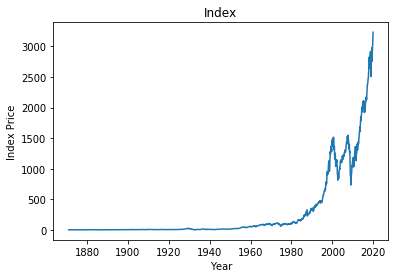

In [710]:
plt.title("Index")
plt.ylabel("Index Price")
plt.xlabel("Year")
plt.plot(data.yyyymm, data.Index)
plt.savefig("index_price")
plt.show()


In [711]:
data['log_ret'] = np.log(data.Index) - np.log(data.Index.shift(1))

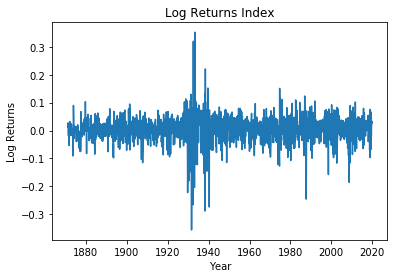

In [712]:
plt.title("Log Returns Index")
plt.ylabel("Log Returns")
plt.xlabel("Year")
plt.plot(data.yyyymm, data.log_ret)
plt.savefig("legret_index")
plt.show()


## Question 1

In [713]:
from statsmodels.tsa.ar_model import AutoReg

C:\Users\Aldert\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


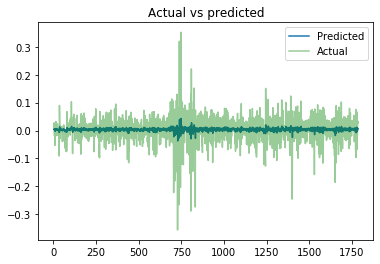

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                log_ret   No. Observations:                 1787
Model:                     AutoReg(1)   Log Likelihood                2935.660
Method:               Conditional MLE   S.D. of innovations              0.047
Date:                Sun, 14 Mar 2021   AIC                             -6.122
Time:                        21:08:53   BIC                             -6.113
Sample:                             1   HQIC                            -6.119
                                 1787                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0033      0.001      2.941      0.003       0.001       0.005
log_ret.L1     0.1137      0.024      4.834      0.000       0.068       0.160
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            8.7988           +0.0000j            8.7988            0.0000
-----------------------------------------------------------------------------
"""

In [714]:
model = AutoReg(data.log_ret.dropna(), lags=1)
model_fit = model.fit()
pred = model_fit.predict()

plt.title("Actual vs predicted")
plt.plot(pred, label="Predicted")
plt.plot(data.log_ret.dropna(), c='G', alpha=0.4, label="Actual")
plt.legend()
plt.savefig("pred_vs_actual")
plt.show()

model_fit.summary()

In [715]:
res = (pred - data.log_ret.dropna())

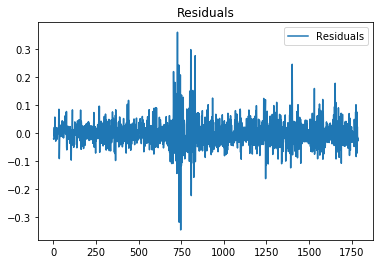

In [716]:
plt.title("Residuals")
plt.plot(res, label="Residuals")
plt.legend()
plt.show()

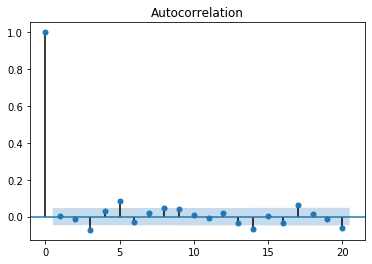

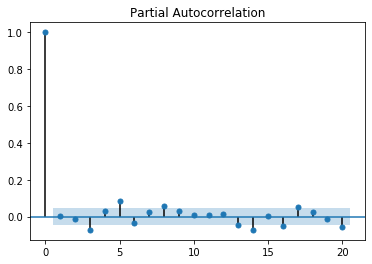

In [717]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(res.dropna().to_numpy(), lags=20)
plt.savefig("acf_AR1")
plot_pacf(res.dropna().to_numpy(), lags=20)
plt.savefig("pacf_AR1")
plt.show()

## Question 2

In [718]:
from arch import arch_model 

In [719]:
model = arch_model(data.log_ret.dropna(), mean="ARX")
model_fit = model.fit()
print(model_fit.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: -3208.3210166244044
Iteration:      2,   Func. Count:     18,   Neg. LLF: -3208.4895520064633
Iteration:      3,   Func. Count:     29,   Neg. LLF: -3208.4912851024515
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3208.963319791852
Iteration:      5,   Func. Count:     45,   Neg. LLF: -3211.107721717659
Iteration:      6,   Func. Count:     53,   Neg. LLF: -3211.190180011341
Iteration:      7,   Func. Count:     60,   Neg. LLF: -3211.578844268477
Iteration:      8,   Func. Count:     66,   Neg. LLF: -3211.59935990731
Iteration:      9,   Func. Count:     72,   Neg. LLF: -3211.601539717295
Iteration:     10,   Func. Count:     78,   Neg. LLF: -3211.6015458239835
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -3211.6015458238708
            Iterations: 10
            Function evaluations: 78
            Gradient evaluations: 10
                           AR - GARCH Model Results    

C:\Users\Aldert\anaconda3\lib\site-packages\arch\univariate\base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.002214. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


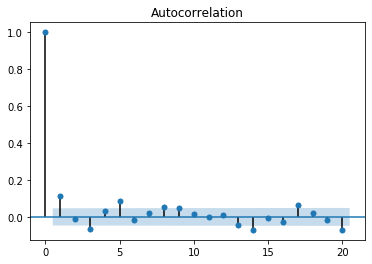

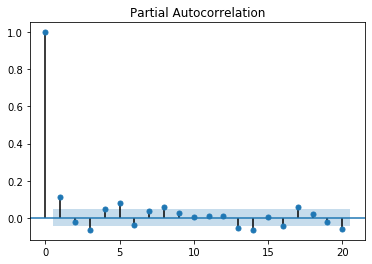

In [720]:
plot_acf(model_fit.resid.to_numpy(), lags=20)
plt.savefig("acf_ar_garch")
plot_pacf(model_fit.resid.to_numpy(), lags=20)
plt.savefig("pacf_ar_garch")
plt.show()

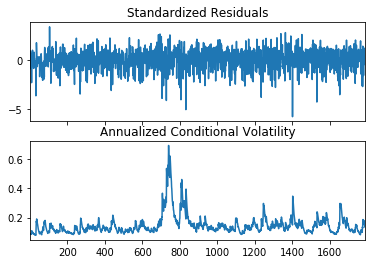

In [721]:
fig = model_fit.plot(annualize='M')
plt.show()

## Question 3

In [722]:
model = arch_model(data.log_ret.dropna(), p=1, o=1, q=1)
model_fit = model.fit()
print(model_fit.summary())
loglike_gjrgarch = model_fit.loglikelihood

Iteration:      1,   Func. Count:      7,   Neg. LLF: -3213.135111733912
Iteration:      2,   Func. Count:     20,   Neg. LLF: -3213.185788296484
Iteration:      3,   Func. Count:     33,   Neg. LLF: -3213.1922234274643
Iteration:      4,   Func. Count:     47,   Neg. LLF: -3213.1932836656188
Iteration:      5,   Func. Count:     59,   Neg. LLF: -3214.1369137759107
Iteration:      6,   Func. Count:     72,   Neg. LLF: -3214.145628115987
Iteration:      7,   Func. Count:     81,   Neg. LLF: -3214.8060008836783
Iteration:      8,   Func. Count:     90,   Neg. LLF: -3214.9412309901454
Iteration:      9,   Func. Count:     99,   Neg. LLF: -3214.9543181127738
Iteration:     10,   Func. Count:    107,   Neg. LLF: -3215.1685460515973
Iteration:     11,   Func. Count:    114,   Neg. LLF: -3215.1795317198566
Iteration:     12,   Func. Count:    122,   Neg. LLF: -3215.182513192663
Iteration:     13,   Func. Count:    129,   Neg. LLF: -3215.1844017062285
Iteration:     14,   Func. Count:    136, 

C:\Users\Aldert\anaconda3\lib\site-packages\arch\univariate\base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.002214. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


In [723]:
model = arch_model(data.log_ret.dropna(), p=1, q=1)
model_fit = model.fit()
print(model_fit.summary())
loglike_garch = model_fit.loglikelihood

Iteration:      1,   Func. Count:      6,   Neg. LLF: -3208.3210166244044
Iteration:      2,   Func. Count:     18,   Neg. LLF: -3208.4895520064633
Iteration:      3,   Func. Count:     29,   Neg. LLF: -3208.4912851024515
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3208.963319791852
Iteration:      5,   Func. Count:     45,   Neg. LLF: -3211.107721717659
Iteration:      6,   Func. Count:     53,   Neg. LLF: -3211.190180011341
Iteration:      7,   Func. Count:     60,   Neg. LLF: -3211.578844268477
Iteration:      8,   Func. Count:     66,   Neg. LLF: -3211.59935990731
Iteration:      9,   Func. Count:     72,   Neg. LLF: -3211.601539717295
Iteration:     10,   Func. Count:     78,   Neg. LLF: -3211.6015458239835
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -3211.6015458238708
            Iterations: 10
            Function evaluations: 78
            Gradient evaluations: 10
                     Constant Mean - GARCH Model Result

C:\Users\Aldert\anaconda3\lib\site-packages\arch\univariate\base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.002214. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


In [724]:
from scipy.stats import chi2

def likelihood_ratio(llmin, llmax):
    return(2*(llmax-llmin))

LR = likelihood_ratio(loglike_garch, loglike_gjrgarch)
p = chi2.sf(LR, 1) # L2 has 1 DoF more than L1

print ('p: %.30f' % p) 

p: 0.007430984411657340880930089355


# Second Part

In [823]:
#import data
xlsx = pd.ExcelFile("data\\bloomberg_data.xlsx")

In [824]:
data_spx = pd.read_excel(xlsx, "SPX")
data_aex = pd.read_excel(xlsx, "AEX")
data_mxeur = pd.read_excel(xlsx, "MXEUR")
data_mxwo = pd.read_excel(xlsx, "MXWO")
data_dax = pd.read_excel(xlsx, "DAX")
data_nky = pd.read_excel(xlsx, "NKY")

In [825]:
plt.plot(data_spx["Date"], data_spx["P/E_Ratio"], label="P/E Ratio SPX")
plt.plot(data_mxwo["Date"], data_mxwo["P/E_Ratio"], label="P/E Ratio World")
plt.plot(data_dax["Date"], data_dax["P/E_Ratio"], label="P/E Ratio DAX")
plt.plot(data_nky["Date"], data_nky["P/E_Ratio"], label="P/E Ratio NKY")

plt.legend()
plt.title("P/E Ratio for various indexes")
#plt.figure(figsize=(11,6))
plt.savefig("pe_ratio_index")
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

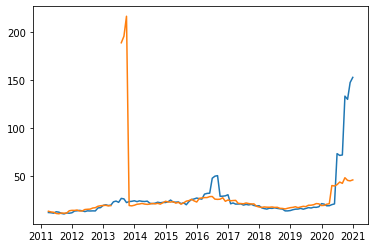

In [826]:
plt.plot(data_aex["Date"], data_aex["P/E_Ratio"], label="P/E Ratio AEX")
plt.plot(data_mxeur["Date"], data_mxeur["P/E_Ratio"], label="P/E Ratio Europe")
plt.show

In [827]:
import statsmodels.api as sm
from statsmodels.api import add_constant

#### Regression SPX

In [828]:
y =  data_spx["Last_Price"]
X_spx_price = data_spx["P/E_Ratio"]
X_spx_price = add_constant(range(len(y)))


model = sm.OLS(y, X_spx_price)
results = model.fit()
res_spx_peratio = results.resid

t_spx = results.tvalues
parameters_spx = results.params
rsquared_spx = results.rsquared
pvalues_spx = results.pvalues


#### Regression MSCI World

In [829]:
y =  data_mxwo["Last_Price"]
X_mxwo_price = data_mxwo["P/E_Ratio"]
X_mxwo_price = add_constant(range(len(y)))


model = sm.OLS(y, X_mxwo_price)
results = model.fit()
res_mxwo_peratio = results.resid

t_mxwo = results.tvalues
parameters_mxwo = results.params
rsquared_mxwo = results.rsquared
pvalues_mxwo = results.pvalues

#### Regression DAX

In [830]:
y =  data_dax["Last_Price"]
X_dax_price = data_dax["P/E_Ratio"]
X_dax_price = add_constant(range(len(y)))


model = sm.OLS(y, X_dax_price)
results = model.fit()
res_dax_peratio = results.resid

t_dax = results.tvalues
parameters_dax = results.params
rsquared_dax = results.rsquared
pvalues_dax = results.pvalues

#### Regression NKY

In [831]:
y =  data_nky["Last_Price"]
X_nky_price = data_nky["P/E_Ratio"]
X_nky_price = add_constant(range(len(y)))


model = sm.OLS(y, X_nky_price)
results = model.fit()
res_nky_peratio = results.resid

t_nky = results.tvalues
parameters_nky = results.params
rsquared_nky = results.rsquared
pvalues_nky = results.pvalues

Create table

In [832]:
from prettytable import PrettyTable

In [833]:
price_pe = PrettyTable()

price_pe.title = "Subsequent Price Regressed on P/E Ratio"

price_pe.field_names = ["Index", "alpha", "beta", "t-statistics", "P-value", "R-squared"]

price_pe.add_row(["S&P 500", round(parameters_spx[0],2), round(parameters_spx[1],2), round(t_spx[1],2), round(pvalues_spx[1],3), round(rsquared_spx,4)])
price_pe.add_row(["MSCI World", round(parameters_mxwo[0],2), round(parameters_mxwo[1],2), round(t_mxwo[1],2), round(pvalues_mxwo[1],3), round(rsquared_mxwo,4)])
price_pe.add_row(["DAX", round(parameters_dax[0],2), round(parameters_dax[1],2), round(t_dax[1],2), round(pvalues_dax[1],3), round(rsquared_dax,4)])
price_pe.add_row(["NKY", round(parameters_nky[0],2), round(parameters_nky[1],2), round(t_nky[1],2), round(pvalues_nky[1],3), round(rsquared_nky,4)])

print(price_pe)

+----------------------------------------------------------------------+
|               Subsequent Price Regressed on P/E Ratio                |
+------------+----------+---------+--------------+---------+-----------+
|   Index    |  alpha   |   beta  | t-statistics | P-value | R-squared |
+------------+----------+---------+--------------+---------+-----------+
|  S&P 500   | 3248.03  |  -18.04 |    -49.58    |   0.0   |   0.9549  |
| MSCI World |  2338.9  |  -9.71  |    -31.59    |   0.0   |   0.8959  |
|    DAX     | 13596.79 |  -57.41 |    -21.87    |   0.0   |   0.8048  |
|    NKY     | 25060.99 | -133.64 |    -27.02    |   0.0   |   0.8629  |
+------------+----------+---------+--------------+---------+-----------+


#### Regression Yields(returns)

In [834]:
#data adjustments
data_spx['log_ret'] = np.log(data_spx.Last_Price) - np.log(data_spx.Last_Price.shift(-1))
data_spx['log_ret_pe'] = np.log(data_spx['P/E_Ratio']) - np.log(data_spx['P/E_Ratio'].shift(-1))
data_spx = data_spx.dropna()

data_mxwo['log_ret'] = np.log(data_mxwo.Last_Price) - np.log(data_mxwo.Last_Price.shift(-1))
data_mxwo['log_ret_pe'] = np.log(data_mxwo['P/E_Ratio']) - np.log(data_mxwo['P/E_Ratio'].shift(-1))
data_mxwo = data_mxwo.dropna()

data_dax['log_ret'] = np.log(data_dax.Last_Price) - np.log(data_dax.Last_Price.shift(-1))
data_dax['log_ret_pe'] = np.log(data_dax['P/E_Ratio']) - np.log(data_dax['P/E_Ratio'].shift(-1))
data_dax = data_dax.dropna()

data_nky['log_ret'] = np.log(data_nky.Last_Price) - np.log(data_nky.Last_Price.shift(-1))
data_nky['log_ret_pe'] = np.log(data_nky['P/E_Ratio']) - np.log(data_nky['P/E_Ratio'].shift(-1))
data_nky = data_nky.dropna()

#### Regresion SPX

In [835]:
y =  data_spx["Yield"]
X_spx_ret = data_spx["P/E_Ratio"]
X_spx_ret = add_constant(range(len(y)))

model = sm.OLS(y, X_spx_ret)
results = model.fit()

res_spx_ret_peratio = results.resid
t_spx = results.tvalues
parameters_spx = results.params
rsquared_spx_ret = results.rsquared
pvalues_spx = results.pvalues

#### Regression MXWO

In [836]:
y =  data_mxwo["Yield"]
X_mxwo_ret = data_mxwo["P/E_Ratio"]
X_mxwo_ret = add_constant(range(len(y)))


model = sm.OLS(y, X_mxwo_ret)
results = model.fit()

res_mxwo_ret_peratio = results.resid

t_mxwo = results.tvalues
parameters_mxwo = results.params
rsquared_mxwo_ret = results.rsquared
pvalues_mxwo = results.pvalues

#### Regession Dax

In [837]:
y =  data_dax["Yield"]
X_dax_ret = data_dax["P/E_Ratio"]
X_dax_ret = add_constant(range(len(y)))


model = sm.OLS(y, X_dax_ret)
results = model.fit()

res_dax_ret_peratio = results.resid

t_dax = results.tvalues
parameters_dax = results.params
rsquared_dax_ret = results.rsquared
pvalues_dax = results.pvalues
print(results.params)

const    2.779074
x1       0.005165
dtype: float64


#### Regression NKY

In [838]:
y =  data_nky["Yield"]
X_nky_ret = data_nky["P/E_Ratio"]
X_nky_ret = add_constant(range(len(y)))


model = sm.OLS(y, X_nky_ret)
results = model.fit()

res_nky_ret_peratio = results.resid

t_nky = results.tvalues
parameters_nky = results.params
rsquared_nky_ret = results.rsquared
pvalues_nky = results.pvalues

In [878]:
yield_pe = PrettyTable()

yield_pe.title = "Subsequent Yields regressed on P/E Ratio"

yield_pe.field_names = ["Index", "alpha", "beta", "t-statistics", "P-value", "R-squared"]

yield_pe.add_row(["S&P 500", round(parameters_spx[0],2), round(parameters_spx[1],4), round(t_spx[1],2),round(pvalues_spx[1],2), round(rsquared_spx,4)])
yield_pe.add_row(["MSCI World", round(parameters_mxwo[0],2), round(parameters_mxwo[1],4), round(t_mxwo[1],2),round(pvalues_mxwo[1],2), round(rsquared_mxwo,4)])
yield_pe.add_row(["DAX", round(parameters_dax[0],2), round(parameters_dax[1],4), round(t_dax[1],2),round(pvalues_dax[1],2), round(rsquared_dax,4)])
yield_pe.add_row(["NKY", round(parameters_nky[0],2), round(parameters_nky[1],4), round(t_nky[1],2), round(pvalues_nky[1],2), round(rsquared_nky,4)])

print(yield_pe)

+-------------------------------------------------------------------+
|              Subsequent Yields regressed on P/E Ratio             |
+------------+-------+---------+--------------+---------+-----------+
|   Index    | alpha |   beta  | t-statistics | P-value | R-squared |
+------------+-------+---------+--------------+---------+-----------+
|  S&P 500   |  1.91 |  0.0017 |     5.03     |   0.0   |   0.9549  |
| MSCI World |  2.3  |  0.004  |     9.34     |   0.0   |   0.8959  |
|    DAX     |  2.78 |  0.0052 |     4.68     |   0.0   |   0.8048  |
|    NKY     |  1.85 | -0.0003 |    -0.48     |   0.63  |   0.8629  |
+------------+-------+---------+--------------+---------+-----------+


#### Durbin Watson test

In [840]:
from statsmodels.stats.stattools import durbin_watson

#### Price DW test

In [841]:
dw_spx_price = durbin_watson(res_spx_peratio)
dw_mxwo_price = durbin_watson(res_mxwo_peratio)
dw_dax_price = durbin_watson(res_dax_peratio)
dw_nky_price = durbin_watson(res_nky_peratio)

#### Returns DW test

In [842]:
dw_spx_ret = durbin_watson(res_spx_ret_peratio)
dw_mxwo_ret = durbin_watson(res_mxwo_ret_peratio)
dw_dax_ret = durbin_watson(res_dax_ret_peratio)
dw_nky_ret = durbin_watson(res_nky_ret_peratio)

#### White test

In [843]:
from statsmodels.stats.diagnostic import het_white

#### Price White test

In [844]:
white_spx_price = het_white(res_spx_peratio, X_spx_price)
white_mxwo_price = het_white(res_mxwo_peratio, X_mxwo_price)
white_dax_price = het_white(res_dax_peratio, X_dax_price)
white_nky_price = het_white(res_nky_peratio, X_nky_price)

#### Return White test

In [845]:
white_spx_ret = het_white(res_spx_ret_peratio, X_spx_ret)
white_mxwo_ret = het_white(res_mxwo_ret_peratio, X_mxwo_ret)
white_dax_ret = het_white(res_dax_ret_peratio, X_dax_ret)
white_nky_ret = het_white(res_nky_ret_peratio, X_nky_ret)

Table Autocorrelation & Heteroscedasticity: Price regressed on P/E ratio

In [846]:
ac_het_price = PrettyTable()
ac_het_price.title = "Autocorrelation and Heteroscedasticity: Price Regressed on P/E Ratio: DW and White Test"
ac_het_price.field_names = ["Index", "DW", "White test nxRsquared", "p-value", "AC and HET"]
ac_het_price.add_row(["S&P 500", round(dw_spx_price,3), round(white_spx_price[0],3), round(white_spx_price[1],4), "Accept"])
ac_het_price.add_row(["MSCI World", round(dw_mxwo_price,3), round(white_mxwo_price[0],3), round(white_mxwo_price[1],4), "Accept"])
ac_het_price.add_row(["DAX", round(dw_dax_price,3), round(white_dax_price[0],3), round(white_dax_price[1],4), 'Reject'])
ac_het_price.add_row(["NKY", round(dw_nky_price,3), round(white_nky_price[0],3), round(white_nky_price[1],4), 'Reject'])
print(ac_het_price)

+-----------------------------------------------------------------------------------------+
| Autocorrelation and Heteroscedasticity: Price Regressed on P/E Ratio: DW and White Test |
+----------------+---------+--------------------------------+------------+----------------+
|     Index      |    DW   |     White test nxRsquared      |  p-value   |   AC and HET   |
+----------------+---------+--------------------------------+------------+----------------+
|    S&P 500     |   0.53  |             20.703             |    0.0     |     Accept     |
|   MSCI World   |  0.444  |             9.656              |   0.008    |     Accept     |
|      DAX       |  0.301  |             3.384              |   0.1841   |     Reject     |
|      NKY       |  0.245  |             0.317              |   0.8533   |     Reject     |
+----------------+---------+--------------------------------+------------+----------------+


Table  Autocorrelation & Heteroscedasticity: Returns regressed on P/E ratio

In [879]:
ac_het_ret = PrettyTable()
ac_het_ret.title = "Autocorrelation and Heteroscedasticity: Yields Regressed on P/E Ratio: DW and White Test"
ac_het_ret.field_names = ["Index", "DW", "White test nxRsquared", "p-value", "AC and HET"]
ac_het_ret.add_row(["S&P 500", round(dw_spx_ret,3), round(white_spx_ret[0],3), round(white_spx_ret[1],4), "Accept"])
ac_het_ret.add_row(["MSCI World", round(dw_mxwo_ret,3), round(white_mxwo_ret[0],3), round(white_mxwo_ret[1],4), "Accept"])
ac_het_ret.add_row(["DAX", round(dw_dax_ret,3), round(white_dax_ret[0],3), round(white_dax_ret[1],4), 'Accept*'])
ac_het_ret.add_row(["NKY", round(dw_nky_ret,3), round(white_nky_ret[0],3), round(white_nky_ret[1],4), 'Accept'])
print(ac_het_ret)
print("* Accepted with 10% signficance level")

+--------------------------------------------------------------------------------------------+
|  Autocorrelation and Heteroscedasticity: Yields Regressed on P/E Ratio: DW and White Test  |
+-----------------+----------+--------------------------------+------------+-----------------+
|      Index      |    DW    |     White test nxRsquared      |  p-value   |    AC and HET   |
+-----------------+----------+--------------------------------+------------+-----------------+
|     S&P 500     |  0.479   |             6.521              |   0.0384   |      Accept     |
|    MSCI World   |  0.407   |             23.233             |    0.0     |      Accept     |
|       DAX       |   0.25   |             5.492              |   0.0642   |     Accept*     |
|       NKY       |  0.163   |             16.704             |   0.0002   |      Accept     |
+-----------------+----------+--------------------------------+------------+-----------------+
* Accepted with 10% signficance level


#### Unit Root test

In [848]:
from arch.unitroot import PhillipsPerron

In [876]:
pp_spx_ret = PhillipsPerron(data_spx["Yield"])
pp_spx_pe = PhillipsPerron(data_spx["P/E_Ratio"])
pp_spx_price = PhillipsPerron(data_spx["Last_Price"])

print(pp_spx_ret.summary())

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -4.396
P-value                         0.000
Lags                               13
-------------------------------------

Trend: Constant
Critical Values: -3.49 (1%), -2.89 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [850]:
pp_mxwo_ret = PhillipsPerron(data_mxwo["Yield"])
pp_mxwo_pe = PhillipsPerron(data_mxwo["P/E_Ratio"])
pp_mxwo_price = PhillipsPerron(data_mxwo["Last_Price"])

In [883]:
pp_dax_ret = PhillipsPerron(data_dax["Yield"])
pp_dax_pe = PhillipsPerron(data_dax["P/E_Ratio"])
pp_dax_price = PhillipsPerron(data_dax["Last_Price"])

In [884]:
pp_nky_ret = PhillipsPerron(data_nky["Yield"])
pp_nky_pe = PhillipsPerron(data_nky["P/E_Ratio"])
pp_nky_price = PhillipsPerron(data_nky["Last_Price"])

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -7.408
P-value                         0.000
Lags                               13
-------------------------------------

Trend: Constant
Critical Values: -3.49 (1%), -2.89 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


Table for test for unit rooot and stationary: Phillips-Perron test

In [885]:
pp_test = PrettyTable()

pp_test.title = 'Test for Unit Root and Stationarity: Phillips-Perron (P&P) Test'

pp_test.field_names = ["Index", "Price", "Yield", "P/E Ratio"]

pp_test.add_row(["S&P 500", round(pp_spx_price.pvalue,3), round(pp_spx_ret.pvalue,3), round(pp_spx_pe.pvalue,5)])
pp_test.add_row(["MSCI World", round(pp_mxwo_price.pvalue,3), round(pp_mxwo_ret.pvalue,3), round(pp_mxwo_pe.pvalue,5)])
pp_test.add_row(["DAX", round(pp_dax_price.pvalue,3), round(pp_dax_ret.pvalue,3), round(pp_dax_pe.pvalue,5)])
pp_test.add_row(["NKY", round(pp_nky_price.pvalue,3), round(pp_nky_ret.pvalue,3), round(pp_nky_pe.pvalue,5)])

print(pp_test)

+---------------------------------------------------------------+
| Test for Unit Root and Stationarity: Phillips-Perron (P&P) Test |
+--------------------+-----------+-----------+------------------+
|       Index        |   Price   |   Yield   |    P/E Ratio     |
+--------------------+-----------+-----------+------------------+
|      S&P 500       |   0.128   |    0.0    |      0.0027      |
|     MSCI World     |   0.125   |   0.002   |     0.00132      |
|        DAX         |   0.603   |   0.067   |       0.0        |
|        NKY         |    0.53   |   0.075   |     0.00146      |
+--------------------+-----------+-----------+------------------+


#### Test for Cointegration (Johansens' test)

In [854]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

Data adjustments

In [886]:
df_spx_price_pe = data_spx[['Last_Price','P/E_Ratio']]
df_spx_ret_pe = data_spx[['Yield','P/E_Ratio']]

df_mxwo_price_pe = data_mxwo[['Last_Price','P/E_Ratio']]
df_mxwo_ret_pe = data_mxwo[['Yield','P/E_Ratio']]

df_dax_price_pe = data_dax[['Last_Price','P/E_Ratio']]
df_dax_ret_pe = data_dax[['Yield','P/E_Ratio']]

df_nky_price_pe = data_nky[['Last_Price','P/E_Ratio']]
df_nky_ret_pe = data_nky[['Yield','P/E_Ratio']]

Cointegration test SPX

In [887]:
#price
x = coint_johansen(df_spx_price_pe,0,1)
eigen_spx_price_pe = x.eig
cv_spx_price_pe = x.cvt
maxeig_spx_price_pe = x.max_eig_stat

#returns
x = coint_johansen(df_spx_ret_pe,0,1)
eigen_spx_ret_pe = x.eig
cv_spx_ret_pe = x.cvt
maxeig_spx_ret_pe = x.max_eig_stat

Cointegration test MXWO

In [888]:
#price
x = coint_johansen(df_mxwo_price_pe,0,1)
eigen_mxwo_price_pe = x.eig
cv_mxwo_pric_pe = x.cvt
maxeig_mxwo_price_pe = x.max_eig_stat

#returns
x = coint_johansen(df_mxwo_ret_pe,0,1)
eigen_mxwo_ret_pe = x.eig
cv_mxwo_ret_pe = x.cvt
maxeig_mxwo_ret_pe = x.max_eig_stat

Cointegration test DAX

In [889]:
#price
x = coint_johansen(df_dax_price_pe,0,1)
eigen_dax_price_pe = x.eig
cv_dax_price_pe = x.cvt
maxeig_dax_price_pe = x.max_eig_stat

#returns
x = coint_johansen(df_dax_ret_pe,0,1)
eigen_dax_ret_pe = x.eig
cv_dax_ret_pe = x.cvt
maxeig_dax_ret_pe = x.max_eig_stat

Cointegration test NKY

In [890]:
#price
x = coint_johansen(df_nky_price_pe,0,1)
eigen_nky_price_pe = x.eig
cv_nky_price_pe = x.cvt
maxeig_nky_price_pe = x.max_eig_stat

#returns
x = coint_johansen(df_nky_ret_pe,0,1)
eigen_nky_ret_pe = x.eig
cv_nky_ret_pe = x.cvt
maxeig_nky_ret_pe = x.max_eig_stat

In [891]:
print(cv_nky_ret_pe)




[[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]


Table Johansen Cointegration test 

In [892]:
table_cointegration_results_price_pe = PrettyTable()

table_cointegration_results_price_pe.title = "Johansen Cointegration Tests Price Regressed on P/E"

table_cointegration_results_price_pe.field_names = ["Index", "Eigenvalue", "Max-Eigen Statistic"]

table_cointegration_results_price_pe.add_row(["S&P 500 None", round(eigen_spx_price_pe[0],4), round(maxeig_spx_price_pe[0],4)])
table_cointegration_results_price_pe.add_row(["S&P 500 at most 1", round(eigen_spx_price_pe[1],4), round(maxeig_spx_price_pe[1],4)])

table_cointegration_results_price_pe.add_row(["MSCI World None", round(eigen_mxwo_price_pe[0],4), round(maxeig_mxwo_price_pe[0],4)])
table_cointegration_results_price_pe.add_row(["MSCI World at most 1", round(eigen_mxwo_price_pe[0],4), round(maxeig_mxwo_price_pe[1],4)])

table_cointegration_results_price_pe.add_row(["DAX None", round(eigen_dax_price_pe[0],4), round(maxeig_dax_price_pe[0],4)])
table_cointegration_results_price_pe.add_row(["DAX at most 1", round(eigen_mxwo_price_pe[1],4), round(maxeig_dax_price_pe[1],4)])

table_cointegration_results_price_pe.add_row(["NKY None", round(eigen_nky_price_pe[0],4), round(maxeig_nky_price_pe[0],4)])
table_cointegration_results_price_pe.add_row(["NKY at most 1", round(eigen_nky_price_pe[1],4), round(maxeig_nky_price_pe[1],4)])

print(table_cointegration_results_price_pe)

+---------------------------------------------------------+
|   Johansen Cointegration Tests Price Regressed on P/E   |
+----------------------+------------+---------------------+
|        Index         | Eigenvalue | Max-Eigen Statistic |
+----------------------+------------+---------------------+
|     S&P 500 None     |   0.1036   |       12.5833       |
|  S&P 500 at most 1   |   0.0006   |        0.0704       |
|   MSCI World None    |   0.1423   |        17.653       |
| MSCI World at most 1 |   0.1423   |        0.8039       |
|       DAX None       |   0.3812   |       55.2018       |
|    DAX at most 1     |   0.007    |        1.3121       |
|       NKY None       |   0.1651   |       20.7468       |
|    NKY at most 1     |   0.0032   |        0.3708       |
+----------------------+------------+---------------------+


In [893]:
table_cointegration_results_ret_pe = PrettyTable()

table_cointegration_results_ret_pe.title = "Johansen Cointegration Tests Yields Regressed on P/E"

table_cointegration_results_ret_pe.field_names = ["Index", "Eigenvalue", "Max-Eigen Statistic"]

table_cointegration_results_ret_pe.add_row(["S&P 500 None", round(eigen_spx_ret_pe[0],4), round(maxeig_spx_ret_pe[0],4)])
table_cointegration_results_ret_pe.add_row(["S&P 500 at most 1", round(eigen_spx_ret_pe[1],4), round(maxeig_spx_ret_pe[1],4)])

table_cointegration_results_ret_pe.add_row(["MSCI World None", round(eigen_mxwo_ret_pe[0],4), round(maxeig_mxwo_ret_pe[0],4)])
table_cointegration_results_ret_pe.add_row(["MSCI World at most 1", round(eigen_mxwo_ret_pe[0],4), round(maxeig_mxwo_ret_pe[1],4)])

table_cointegration_results_ret_pe.add_row(["DAX None", round(eigen_dax_ret_pe[0],4), round(maxeig_dax_ret_pe[0],4)])
table_cointegration_results_ret_pe.add_row(["DAX at most 1", round(eigen_mxwo_ret_pe[1],4), round(maxeig_dax_ret_pe[1],4)])

table_cointegration_results_ret_pe.add_row(["NKY None", round(eigen_nky_ret_pe[0],4), round(maxeig_nky_ret_pe[0],4)])
table_cointegration_results_ret_pe.add_row(["NKY at most 1", round(eigen_nky_ret_pe[1],4), round(maxeig_nky_ret_pe[1],4)])
print(table_cointegration_results_ret_pe)

+---------------------------------------------------------+
|   Johansen Cointegration Tests Yields Regressed on P/E  |
+----------------------+------------+---------------------+
|        Index         | Eigenvalue | Max-Eigen Statistic |
+----------------------+------------+---------------------+
|     S&P 500 None     |   0.131    |       16.1499       |
|  S&P 500 at most 1   |   0.0384   |        4.5026       |
|   MSCI World None    |   0.1332   |       16.4376       |
| MSCI World at most 1 |   0.1332   |       12.1668       |
|       DAX None       |   0.3881   |       56.4845       |
|    DAX at most 1     |   0.1004   |        7.4531       |
|       NKY None       |   0.1612   |       20.2088       |
|    NKY at most 1     |   0.0785   |        9.4065       |
+----------------------+------------+---------------------+


In [894]:
cv_cointegration = PrettyTable()

cv_cointegration.title = "Critical Values"

cv_cointegration.field_names = ["10%", "5%", "1%"]
cv_cointegration.add_row(cv_nky_ret_pe[0])
cv_cointegration.add_row(cv_nky_ret_pe[1])

print(cv_cointegration)

+-----------------------------+
|       Critical Values       |
+---------+---------+---------+
|   10%   |    5%   |    1%   |
+---------+---------+---------+
| 13.4294 | 15.4943 | 19.9349 |
|  2.7055 |  3.8415 |  6.6349 |
+---------+---------+---------+


Data Adjustments for the VECM and VAR

In [948]:
#Yield
vecm_spx = data_spx[['Date', 'Yield', 'P/E_Ratio']]
vecm_mxwo = data_mxwo[['Date', 'Yield','P/E_Ratio']]
vecm_dax = data_dax[['Date', 'Yield','P/E_Ratio']]
vecm_nky = data_nky[['Date', 'Yield','P/E_Ratio']]

vecm_spx = vecm_spx.add_suffix('_spx')
vecm_mxwo = vecm_mxwo.add_suffix('_mxwo')
vecm_dax = vecm_dax.add_suffix('_dax')
vecm_nky = vecm_nky.add_suffix('_nky')

vecm_spx = vecm_spx.rename(columns={'Date_spx':'Date'})
vecm_mxwo = vecm_mxwo.rename(columns={'Date_mxwo':'Date'})
vecm_dax = vecm_dax.rename(columns={'Date_dax':'Date'})
vecm_nky = vecm_nky.rename(columns={'Date_nky':'Date'})

In [949]:
#price
vecm_spx_price = data_spx[['Date', 'Last_Price', 'P/E_Ratio']]
vecm_mxwo_price = data_mxwo[['Date', 'Last_Price','P/E_Ratio']]
vecm_dax_price = data_dax[['Date', 'Last_Price','P/E_Ratio']]
vecm_nky_price = data_nky[['Date', 'Last_Price','P/E_Ratio']]

vecm_spx_price = vecm_spx_price.add_suffix('_spx')
vecm_mxwo_price = vecm_mxwo_price.add_suffix('_mxwo')
vecm_dax_price = vecm_dax_price.add_suffix('_dax')
vecm_nky_price = vecm_nky_price.add_suffix('_nky')

vecm_spx_price = vecm_spx_price.rename(columns={'Date_spx':'Date'})
vecm_mxwo_price = vecm_mxwo_price.rename(columns={'Date_mxwo':'Date'})
vecm_dax_price = vecm_dax_price.rename(columns={'Date_dax':'Date'})
vecm_nky_price = vecm_nky_price.rename(columns={'Date_nky':'Date'})

In [950]:
import functools
dfs = [vecm_spx, vecm_mxwo, vecm_dax, vecm_nky]
dfs_price = [vecm_spx, vecm_mxwo_price, vecm_dax_price, vecm_nky_price]


vecm_df = functools.reduce(lambda left,right: pd.merge(left, right, on='Date'), dfs)
vecm_df.index = pd.DatetimeIndex(vecm_df.Date)
vecm_df = vecm_df.drop('Date', axis=1)

vecm_df_price = functools.reduce(lambda left,right: pd.merge(left, right, on='Date'), dfs_price)
vecm_df_price.index = pd.DatetimeIndex(vecm_df_price.Date)
vecm_df_price = vecm_df_price.drop('Date', axis=1)

#### VECM

In [951]:
from statsmodels.tsa.vector_ar.vecm import VECM

In [953]:
model = VECM(vecm_df, k_ar_diff=4)


results = model.fit()
results.summary()

C:\Users\Aldert\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency -1M will be used.
  % freq, ValueWarning)
C:\Users\Aldert\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
Det. terms outside the coint. relation & lagged endog. parameters for equation Yield_spx
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
L1.Yield_spx         -0.4498      0.396     -1.135      0.256      -1.226       0.327
L1.P/E_Ratio_spx     -0.0074      0.035     -0.210      0.834      -0.077       0.062
L1.Yield_mxwo         0.2867      0.320      0.896      0.370      -0.340       0.914
L1.P/E_Ratio_mxwo     0.0299      0.023      1.322      0.186      -0.014       0.074
L1.Yield_dax          0.1055      0.064      1.645      0.100      -0.020       0.231
L1.P/E_Ratio_dax     -0.0051      0.003     -1.506      0.132      -0.012       0.002
L1.Yield_nky          0.0022      0.119      0.018      0.986      -0.232       0.236
L1.P/E_Ratio_nky      0.0005      0.006      0.077      0.938      -0.012       0.012
L2.Yield_spx          0.4944      0.367      1.348      0.178      -0.225       1.213
L2.P/E_Ratio_spx      0.0036      0.034      0.107      0.915      -0.063       0.070
L2.Yield_mxwo        -0.5588      0.325     -1.719      0.086      -1.196       0.078
L2.P/E_Ratio_mxwo    -0.0035      0.022     -0.156      0.876      -0.047       0.040
L2.Yield_dax         -0.0750      0.062     -1.204      0.228      -0.197       0.047
L2.P/E_Ratio_dax     -0.0088      0.003     -2.935      0.003      -0.015      -0.003
L2.Yield_nky         -0.0194      0.118     -0.164      0.870      -0.252       0.213
L2.P/E_Ratio_nky     -0.0006      0.006     -0.106      0.915      -0.012       0.011
L3.Yield_spx          0.4459      0.388      1.149      0.251      -0.315       1.207
L3.P/E_Ratio_spx      0.0771      0.033      2.305      0.021       0.012       0.143
L3.Yield_mxwo        -0.1660      0.337     -0.492      0.623      -0.827       0.495
L3.P/E_Ratio_mxwo     0.0017      0.022      0.078      0.938      -0.041       0.045
L3.Yield_dax          0.1303      0.062      2.116      0.034       0.010       0.251
L3.P/E_Ratio_dax     -0.0023      0.003     -0.766      0.443      -0.008       0.004
L3.Yield_nky         -0.0407      0.111     -0.368      0.713      -0.258       0.176
L3.P/E_Ratio_nky     -0.0102      0.006     -1.821      0.069      -0.021       0.001
L4.Yield_spx         -0.1652      0.372     -0.444      0.657      -0.894       0.564
L4.P/E_Ratio_spx     -0.0218      0.034     -0.632      0.527      -0.089       0.046
L4.Yield_mxwo        -0.0951      0.315     -0.302      0.763      -0.713       0.523
L4.P/E_Ratio_mxwo     0.0133      0.022      0.605      0.545      -0.030       0.056
L4.Yield_dax         -0.0559      0.069     -0.807      0.419      -0.191       0.080
L4.P/E_Ratio_dax     -0.0056      0.004     -1.402      0.161      -0.013       0.002
L4.Yield_nky          0.1217      0.106      1.142      0.253      -0.087       0.330
L4.P/E_Ratio_nky      0.0142      0.006      2.270      0.023       0.002       0.027
Det. terms outside the coint. relation & lagged endog. parameters for equation P/E_Ratio_spx
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
L1.Yield_spx          3.3506      3.761      0.891      0.373      -4.021      10.722
L1.P/E_Ratio_spx     -0.2268      0.335     -0.677      0.498      -0.883       0.429
L1.Yield_mxwo        -2.1095      3.037     -0.695      0.487      -8.062       3.843
L1.P/E_Ratio_mxwo    -0.0371      0.215     -0.173      0.863      -0.458       0.384
L1.Yield_dax         -1.0563      0.608     -1.736      0.083      -2.249       0.136
L1.P/E_Ratio_dax      0.0571      0.032      1.770      0.077      -0.00

In [954]:
model = VECM(vecm_df_price, k_ar_diff=4)

results = model.fit()
results.summary()

C:\Users\Aldert\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency -1M will be used.
  % freq, ValueWarning)
C:\Users\Aldert\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
Det. terms outside the coint. relation & lagged endog. parameters for equation Yield_spx
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
L1.Yield_spx          -0.2992      0.306     -0.978      0.328      -0.899       0.300
L1.P/E_Ratio_spx      -0.0218      0.032     -0.684      0.494      -0.084       0.041
L1.Last_Price_mxwo     0.0005      0.000      1.330      0.183      -0.000       0.001
L1.P/E_Ratio_mxwo     -0.0134      0.024     -0.552      0.581      -0.061       0.034
L1.Last_Price_dax  -3.019e-05   2.52e-05     -1.196      0.232   -7.96e-05    1.93e-05
L1.P/E_Ratio_dax      -0.0044      0.004     -1.097      0.273      -0.012       0.003
L1.Last_Price_nky  -2.717e-05   1.46e-05     -1.865      0.062   -5.57e-05    1.39e-06
L1.P/E_Ratio_nky       0.0060      0.006      0.968      0.333      -0.006       0.018
L2.Yield_spx          -0.3841      0.274     -1.400      0.161      -0.922       0.154
L2.P/E_Ratio_spx      -0.0534      0.031     -1.720      0.085      -0.114       0.007
L2.Last_Price_mxwo    -0.0002      0.000     -0.480      0.631      -0.001       0.001
L2.P/E_Ratio_mxwo      0.0077      0.022      0.354      0.723      -0.035       0.050
L2.Last_Price_dax   2.412e-05   2.48e-05      0.973      0.331   -2.45e-05    7.27e-05
L2.P/E_Ratio_dax      -0.0070      0.004     -1.851      0.064      -0.014       0.000
L2.Last_Price_nky   2.404e-05   1.42e-05      1.688      0.091   -3.87e-06    5.19e-05
L2.P/E_Ratio_nky      -0.0019      0.006     -0.303      0.762      -0.014       0.010
L3.Yield_spx           0.3275      0.281      1.166      0.244      -0.223       0.878
L3.P/E_Ratio_spx       0.0550      0.032      1.721      0.085      -0.008       0.118
L3.Last_Price_mxwo    -0.0003      0.000     -0.863      0.388      -0.001       0.000
L3.P/E_Ratio_mxwo      0.0284      0.022      1.297      0.195      -0.015       0.071
L3.Last_Price_dax   2.716e-05   2.46e-05      1.104      0.270   -2.11e-05    7.54e-05
L3.P/E_Ratio_dax      -0.0040      0.003     -1.199      0.231      -0.011       0.003
L3.Last_Price_nky   1.407e-05    1.4e-05      1.008      0.313   -1.33e-05    4.14e-05
L3.P/E_Ratio_nky      -0.0133      0.006     -2.185      0.029      -0.025      -0.001
L4.Yield_spx          -0.3939      0.285     -1.381      0.167      -0.953       0.165
L4.P/E_Ratio_spx      -0.0457      0.033     -1.374      0.170      -0.111       0.020
L4.Last_Price_mxwo -5.691e-05      0.000     -0.148      0.882      -0.001       0.001
L4.P/E_Ratio_mxwo      0.0386      0.022      1.764      0.078      -0.004       0.082
L4.Last_Price_dax   -2.47e-05   2.76e-05     -0.896      0.370   -7.87e-05    2.93e-05
L4.P/E_Ratio_dax       0.0045      0.005      0.939      0.348      -0.005       0.014
L4.Last_Price_nky  -4.336e-06   1.45e-05     -0.299      0.765   -3.28e-05    2.41e-05
L4.P/E_Ratio_nky       0.0032      0.007      0.475      0.635      -0.010       0.016
Det. terms outside the coint. relation & lagged endog. parameters for equation P/E_Ratio_spx
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
L1.Yield_spx           2.7314      2.920      0.935      0.350      -2.992       8.455
L1.P/E_Ratio_spx      -0.0937      0.305     -0.307      0.759      -0.691       0.504
L1.Last_Price_mxwo    -0.0041      0.004     -1.111      0.267      -0.011       0.003
L1.P/E_Ratio_mxwo      0.2552      0.232      1.099      0.272      -0.200       0.710
L1.Last_Price_dax      0.0003      0.000      1.107      0.268      -0.000       0.001
L1.P/E_Ratio_dax       0.0660

#### Granger Causalitytest

In [946]:
from statsmodels.tsa.stattools import grangercausalitytests

In [908]:
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

In [909]:
grangers_causation_matrix(vecm_df, variables = vecm_df.columns)  

Yield_spx_x  P/E_Ratio_spx_x  Yield_mxwo_x  \
Yield_spx_y            1.0000           0.0013        0.0057   
P/E_Ratio_spx_y        0.0506           1.0000        0.0633   
Yield_mxwo_y           0.0221           0.0002        1.0000   
P/E_Ratio_mxwo_y       0.0619           0.0007        0.0967   
Yield_dax_y            0.2097           0.0094        0.4225   
P/E_Ratio_dax_y        0.0655           0.0000        0.0207   
Yield_nky_y            0.0219           0.0658        0.0215   
P/E_Ratio_nky_y        0.0163           0.0825        0.0659   

                  P/E_Ratio_mxwo_x  Yield_dax_x  P/E_Ratio_dax_x  Yield_nky_x  \
Yield_spx_y                 0.0001       0.0001           0.0000       0.0165   
P/E_Ratio_spx_y             0.0000       0.0013           0.0000       0.0919   
Yield_mxwo_y                0.0001       0.0006           0.0002       0.0015   
P/E_Ratio_mxwo_y            1.0000       0.0000           0.0000       0.0835   
Yield_dax_y                 0.0006       1.0000           0.0062       0.0026   
P/E_Ratio_dax_y             0.0000       0.0001           1.0000       0.0875   
Yield_nky_y                 0.0032       0.0026           0.0171       1.0000   
P/E_Ratio_nky_y             0.1812       0.0150           0.0000       0.0165   

                  P/E_Ratio_nky_x  
Yield_spx_y                0.0001  
P/E_Ratio_spx_y            0.0000  
Yield_mxwo_y               0.0001  
P/E_Ratio_mxwo_y           0.0000  
Yield_dax_y                0.0006  
P/E_Ratio_dax_y            0.0000  
Yield_nky_y                0.0000  
P/E_Ratio_nky_y            1.0000